In [312]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker as mtick
import seaborn as sns

import numpy as np


df = pd.read_excel('https://query.data.world/s/q4wmftsxzel7vkcyagmzsg2xufeq7q')

top_prods=df.iloc[:20,[1,4,5]].copy()
top_prods.columns=['producer','flexible_format','rigid_format']
top_prods['total']=top_prods.flexible_format + top_prods.rigid_format
top_prods.sort_values(by='total',ascending=True,inplace=True)

top_prods['pct_flexible']=top_prods.flexible_format/top_prods.total
top_prods['pct_rigid']=top_prods.rigid_format/top_prods.total


# Makeover Monday - 5/31/2021
In this Makeover Monday exercise, the data represents the 20 companies responsible for 55% of plastic waste globally.  

For this visualization, I chose a stacked bar chart to show the difference in scale according by company.  And, for a given company we're able to distinguish their production between rigid plastic which is more likely to be recycled and flexible plastic which has a greater chance of becoming waste.

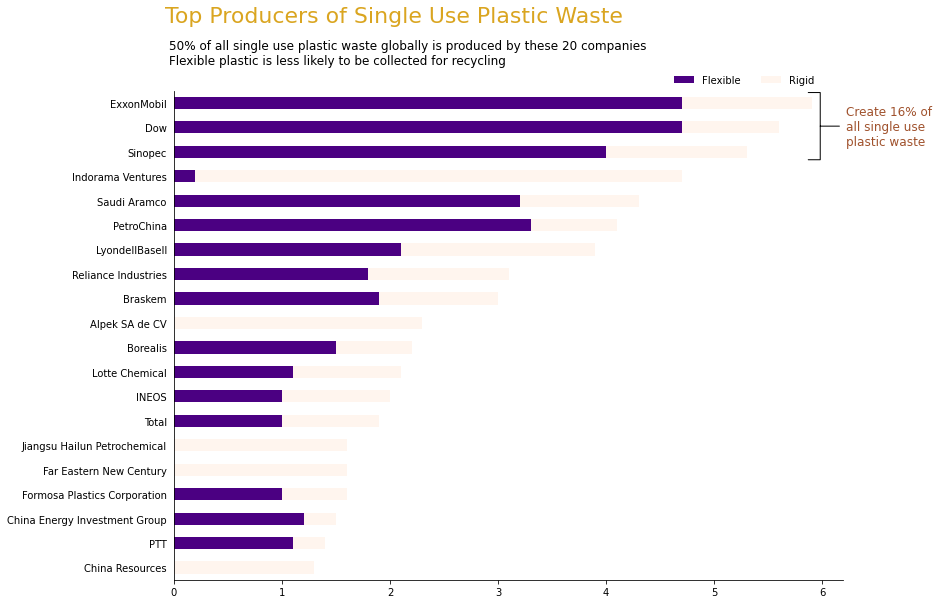


This example uses the following techniques:
- Customizing colors
- Modifying the axes
- Annotating plots


Text(0.18, 0.91, '50% of all single use plastic waste globally is produced by these 20 companies\nFlexible plastic is less likely to be collected for recycling')

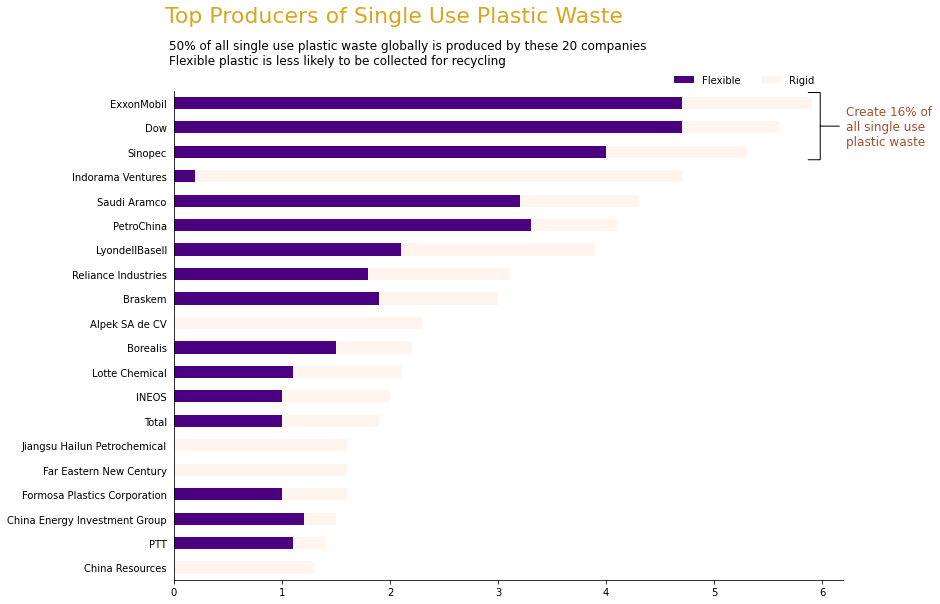

In [333]:
# Use the dataframe to create a stacked bar chart
# The parameter color lets us assign bar colors based on the column names

fig,ax = plt.subplots(figsize=(12,9))
top_prods.loc[:,['producer','flexible_format','rigid_format']].plot.barh(stacked=True,ax=ax,rot=0,
                                                                    color={'rigid_format':'seashell',
                                                                           'flexible_format':'indigo'})


ax.set_yticklabels(top_prods.producer)
ax.tick_params(left=False)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(labels=['Flexible','Rigid'],
           bbox_to_anchor=(.97,1.05),frameon=False,ncol=2)
fig.suptitle('Top Producers of Single Use Plastic Waste',
             x=0.38, y=1.01,size='22', color='goldenrod')

ax.annotate('Create 16% of \nall single use\nplastic waste',xy=(.87,.79), xytext=(.9, .79), xycoords='figure fraction',
            ha='left',va='center',color='sienna',size='12',
            bbox=dict(pad=5, facecolor="none", edgecolor="none"),
            arrowprops=dict(arrowstyle='-[, widthB=2.8, lengthB=1.0', lw=1))

ax.annotate('50% of all single use plastic waste globally is produced by these 20 companies\n'
             'Flexible plastic is less likely to be collected for recycling',
             xy=(.18,.91), xytext=(.18, .91), xycoords='figure fraction',
            ha='left',va='center',color='black',size='12',
            bbox=dict(pad=5, facecolor="none", edgecolor="none"))
